# Computer Vision With Deep Learning Part1

## Introduction
* In this notebook, we will learn about computer vision and deep learning. 
* We will start by understanding the basics of computer vision and then move on to deep learning.
* We will also learn about convolutional neural networks (CNNs) and how they are used in computer vision.
* We will implement a simple CNN model using the Keras library and train it on the MNIST dataset.
* Finally, we will evaluate the model and visualize the results.

In [4]:
print("Install tensorflow")
# !pip install tensorflow

Install tensorflow


## What is Computer Vision?
Computer vision is a field of artificial intelligence that enables computers to interpret and understand the visual world. 


## Our Goals
* Understand the basics of computer vision and deep learning.
* Detect and recognize objects in images using deep learning.
* Learn about convolutional neural networks (CNNs) and how they are used in computer vision.
* Implement a simple CNN model using the Keras library and train it on the MNIST dataset.
* Evaluate the model and visualize the results.
* Learn about techniques to improve the model's performance on image classification tasks.
* Save the model for future use.

## Importing Libraries

In [8]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


2024-07-27 19:05:25.111352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 19:05:25.121080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 19:05:25.124035: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Handwritten Digit Recognition

Download 60000 images of handwritten digits from the MNIST dataset.

In [10]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# df = tf.keras.utils.image_dataset_from_directory("images/trafic-lights")


In [11]:
train_images.shape


(60000, 28, 28)

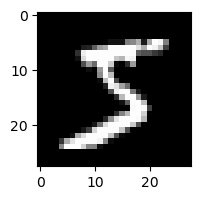

In [12]:
plt.figure(figsize=(3,2))
plt.imshow(train_images[0], cmap='gray')

In [13]:
train_labels[0]

5

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
# train_images[61]

## Normalizing the data
When dividing by 255, we are normalizing the data. 
This is because the pixel values range from 0 to 255. 
By dividing by 255, we are scaling the pixel values to be between 0 and 1.

### Normalize formula

<img src="Normalization-Formula.jpg" width="400">

### Question:
Why do we divide by 255?
### Answer: 
We divide by 255 to normalize the pixel values. The pixel values range from 0 to 255, and by dividing by 255, we are scaling the pixel values to be between 0 and 1. This helps the model learn better and faster.

Normalization formula for pixel values
Normalized pixel values is same as original pixel values


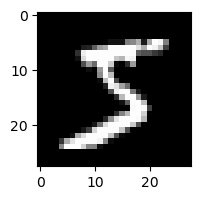

In [18]:
print("Normalization formula for pixel values")
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(3,2))
plt.imshow(train_images[0], cmap='gray')
print("Normalized pixel values is same as original pixel values")

## Convolutional Neural Network - CNN - Image Classification
Explanation of CNN

### 
<img src="cnn1.png" width="500">

---

### 
<img src="cnn2.png" width="500">

---

###  
<img src="cnn3.png" width="500">

---

###  
<img src="cnn4.png" width="500">

---

###  
<img src="cnn5.png" width="500">


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

## Building the CNN model with Bird Images

### Step 1: Load the images
### Step 2: Preprocess the images
### Step 3: Build the CNN model
### Step 4: Compile the model
### Step 5: Train the model
### Step 6: Evaluate the model

<img src="bird-cnn.png" width="500">

In [22]:
model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
# 12 filters, each filter is 3x3. Q:What is kernel size? A: The kernel size is the size of the filter that is applied to the input image. 
# In this case, the kernel size is 3x3, which means that the filter is a 3x3 matrix that is applied to the input image.
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

I0000 00:00:1722096326.616209  507574 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [23]:
history = model.fit(train_images, train_labels, validation_split=0.20, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8522 - loss: 0.5513 - val_accuracy: 0.9655 - val_loss: 0.1270
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9666 - loss: 0.1132 - val_accuracy: 0.9733 - val_loss: 0.0986
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0820 - val_accuracy: 0.9768 - val_loss: 0.0827
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0613 - val_accuracy: 0.9784 - val_loss: 0.0753
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9840 - loss: 0.0539 - val_accuracy: 0.9806 - val_loss: 0.0689
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0460 - val_accuracy: 0.9810 - val_loss: 0.0703
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9876 - loss: 0.0423 - val_accuracy: 0.9809 - val_loss: 0.0684
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9886 - loss: 0.0379 - 

In [24]:
loss, accuracy = model.evaluate(test_images, test_labels)
loss, accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9782 - loss: 0.0740


(0.06176856532692909, 0.9819999933242798)

## Save the model for future use

In [26]:
model.save("my-handwritten-recognition-model.keras")

## Improve the model

### Technique1: Increase the number of layers

In [28]:
model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Technique2: Increase the number of neurons

In [30]:
model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Technique3: add dropout layer to prevent overfitting

In [32]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.add(Dropout(0.5)) # add a dropout layer with a dropout rate of 0.5
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Technique4: Batch normalization

In [34]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(BatchNormalization()) # add a batch normalization layer
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.add(Dropout(0.25)) # add a dropout layer with a dropout rate of 0.5
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Appendix
### Search and Download Images Using Bing Image Downloader

In [36]:
print("Install python-bing-image-downloader")
## install bing-image-downloader
# !pip install bing-image-downloader 
print("Image download")
from bing_image_downloader import downloader
downloader.download("bird", limit=1, output_dir='images', adult_filter_off=True)
downloader.download("skincancer", limit=1, output_dir='images', adult_filter_off=True)

Install python-bing-image-downloader
Image download
[%] Downloading Images to /home/cevheri/Documents/ai/Day 09/images/bird


[!!]Indexing page: 1

[%] Indexed 61 Images on Page 1.


[%] Downloading Image #1 from https://au.newhollandpublishers.com/pub/media/catalog/product/cache/32c3db8536f26a5ade98b0e2d5530502/u/r/urban_birds_working_cover.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to /home/cevheri/Documents/ai/Day 09/images/skincancer


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://miiskin.com/wp-content/uploads/2019/08/signs-of-skin-cancer-infographic.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.


## Conclusion
Deep learning with TensorFlow and Keras is a powerful tool for image classification tasks.
* In this notebook, we learned about computer vision and deep learning.
* Also, we learned about convolutional neural networks (CNNs) and how they are used in computer vision.
* We implemented a simple CNN model using the Keras library and trained it on the MNIST dataset.
* Finally, we evaluated the model and visualized the results.
* We also learned about techniques to improve the model, such as increasing the number of layers, neurons, adding dropout layers, and batch normalization.
* We can use these techniques to improve the model's performance on image classification tasks.
* We also learned how to save the model for future use.
* Bonus: We also learned how to download images using the Bing Image Downloader library. :)

## References
* https://www.tensorflow.org
* https://keras.io
* https://en.wikipedia.org/wiki/Convolutional_neural_network
* https://www.youtube.com/watch?v=wIF0AOqIhPM
* https://www.deeplearningbook.org/
* Thanks Zafer Acar

## Full source code
[Computer Vision With Deep Learning Part1](https://github.com/cevheri/ai-ml-train/blob/main/Day%2009/Day09%20-%20Computer%20Vision%20With%20Deep%20Learning.ipynb)